### EX1

직장인(20~50대)을 대상으로 주당 평균 스마트폰 이용 시간에 대한 조사결과로부터 남녀 간 스마트폰 이용 시간에 차이가 있는지에 대해 가설을 세우고 5% 유의수준 하에서 검정하시오. 단, 남녀 간 이용 시간의 분산은 같다고 가정.

In [10]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt 

data = pd.read_excel("../rawdata/성인_스마트폰_이용시간.xlsx")
print(data.describe())

             male     female
count  100.000000  98.000000
mean    31.273000  32.876531
std      2.912767   3.269282
min     22.200000  24.400000
25%     29.300000  30.900000
50%     31.100000  32.750000
75%     32.975000  34.900000
max     38.900000  41.700000


In [12]:
# Levene 등분산 검정
a1 = pd.read_excel("../rawdata/성인_스마트폰_이용시간_남자.xlsx")
a2 = pd.read_excel("../rawdata/성인_스마트폰_이용시간_여자.xlsx")

In [19]:
result = stats.levene(a1.male, a2.female, center='mean')
print(result)

LeveneResult(statistic=0.47175507324600746, pvalue=0.4929926832749576)


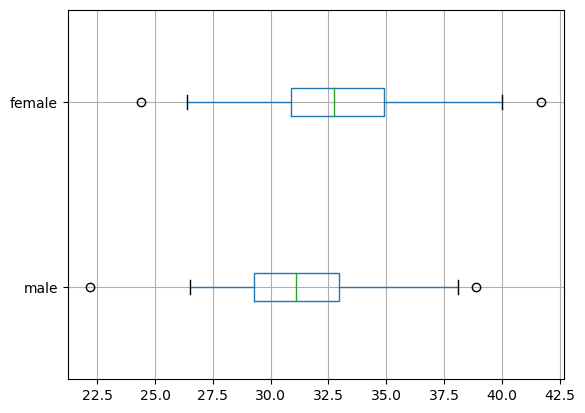

In [13]:
data.boxplot(column=['male', 'female'], vert=False)
plt.show()

In [14]:
d1 = pd.read_excel("../rawdata/성인_스마트폰_이용시간_남자.xlsx")
d2 = pd.read_excel("../rawdata/성인_스마트폰_이용시간_여자.xlsx")
result = stats.ttest_ind(d1.male, d2.female, alternative='two-sided')
print(result)

Ttest_indResult(statistic=-3.645768621069706, pvalue=0.00034151561881195196)


### EX2

대학생을 대상으로 1일 평균 수면 시간을 조사한 결과를 이용하여 남녀 간 수면 시간에 차이가 있는지에 대한 가설을 세우고 유의수준 5% 하에서 검정하시오. 단, 남녀 간 수면 시간의 분산은 같지 않다고 가정.

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy import stats 

data = pd.read_excel("../rawdata/대학생_수면시간.xlsx")
print(data.describe())

            male     female
count  96.000000  99.000000
mean    7.018750   6.418182
std     1.862218   0.956755
min     3.200000   4.400000
25%     5.700000   5.800000
50%     7.000000   6.300000
75%     8.025000   7.000000
max    13.100000   8.900000


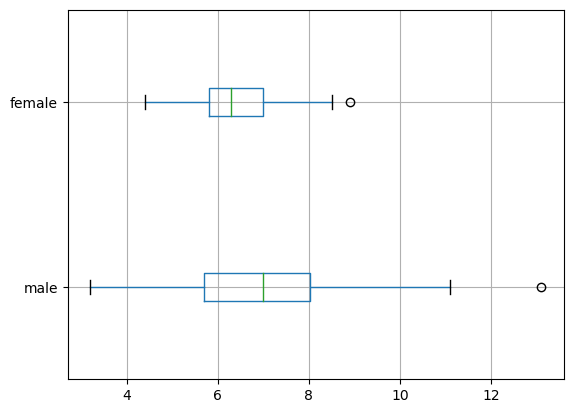

In [16]:
data.boxplot(column=['male', 'female'], vert=False)
plt.show()

In [21]:
d1 = pd.read_excel("../rawdata/대학생_수면시간_남자.xlsx")
d2 = pd.read_excel("../rawdata/대학생_수면시간_여자.xlsx")

levene_result = stats.levene(d1.male, d2.female, center='mean')
print(levene_result)

LeveneResult(statistic=23.026579508637983, pvalue=3.1920354052892813e-06)


In [17]:
d1 = pd.read_excel("../rawdata/대학생_수면시간_남자.xlsx")
d2 = pd.read_excel("../rawdata/대학생_수면시간_여자.xlsx")
result = stats.ttest_ind(d1.male, d2.female, equal_var='False')
print(result)

Ttest_indResult(statistic=2.8450527424639183, pvalue=0.004919637444598858)


### EX3

EX2에서 수집한 데이터가 없고 오로지 기술통계량, 즉 평균, 표준편차, 사례 수만을 알고 있는 경우, 남자의 수면 시간이 여자의 수면시간보다 길다는 가정에 대해 가설을 세우고 유의수준 5%하에서 검정하시오. 단, 남녀 간 수면 시간의 분산은 같지 않다고 가정

In [23]:
from scipy import stats 

result = stats.ttest_ind_from_stats(np.mean(d1.male), np.std(d1.male), len(d1.male), np.mean(d2.female), np.std(d2.female), len(d2.female), equal_var='False', alternative='greater')
print(result)

Ttest_indResult(statistic=2.8598898873726157, pvalue=0.002352135547700069)
